In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline 

df = pd.read_csv("C:/Users/mikeh/OneDrive/Documents/Mike/PythonStudy/tr_cre.csv", encoding = 'latin-1', low_memory = False) 
df["Amount"] = df["Amount"].str.replace(',', '').apply(pd.to_numeric)


# %matplotlib inline includes the graphs next to the code..btw, can't put comments next to this command

# Reading the dataset in a dataframe using Pandas..have to chg MS Windows backslash for file paths to a fwd slash
# First attempt to read EBA yielded and error of "UTF-8...invalid continuation byte" 
# Using... 
# with open("filename.csv") as f:
#    print(f)
# told me that the files was encoded differently (prob because of weird E Europe names).
# encoding = 'cp1252'...which is the same as 'latin-1'. Adding this in the encoding segment of the pd-read_csv() cured this

# but subsequently, df.info() and df.describe(include = 'all') showed that the 'Amount' column was imported as an object
# not as int64 datatype...this meant that you couldn't do any maths on it (so df.describe() came back with NaN rather than
# descriptive stats for max / min / median etc

# My first pass at solving this was
# df["Amount"] = df["Amount"].apply(pd.to_numeric). This led to an error or 'unable to parse string'...by using
# print (df[pd.to_numeric(df.Amount, errors='coerce').isnull()]) I could see what the values were in the CSV file
# similarly writing 
# df["Amount"] = df["Amount"].apply(pd.to_numeric, errors = 'coerce')...followed by 
# df.head(10) 
# showed that some of the numbers (eg 21,893.93) weren't being parsed correctly (this code turned the errors into NaN so I
# could compare with the CSV file to figure out what was going wrong
# StackOverflow showed me how I could manipulate the data in column 'Amount' in the dataframe...replacing the commas with ''
# cured the error

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537555 entries, 0 to 537554
Data columns (total 13 columns):
NSA             537555 non-null object
LEI_Code        537555 non-null object
Item            537555 non-null int64
Label           537555 non-null object
Period          537555 non-null int64
Portfolio       537555 non-null int64
Country         537555 non-null int64
Country_rank    537555 non-null int64
Exposure        537555 non-null int64
Status          537555 non-null int64
Perf_Status     537555 non-null int64
Amount          537555 non-null float64
footnote        26009 non-null object
dtypes: float64(1), int64(8), object(4)
memory usage: 53.3+ MB


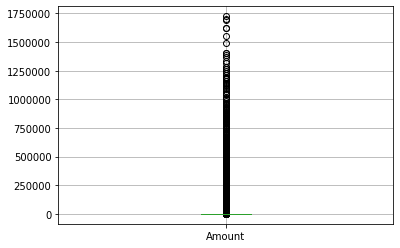

In [45]:
# for further interrogations of the data, using boxplot() to visualise the data quickly
df.boxplot(column='Amount')

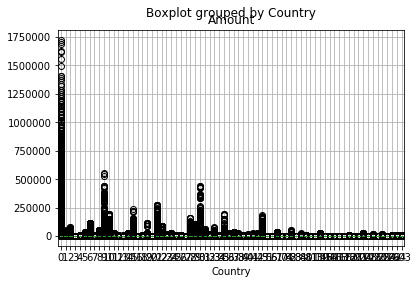

In [5]:
# for further interrogations of the data, using boxplot() to visualise the data quickly
df.boxplot(column='Amount', by = 'Country')

In [7]:
# replicating SUMIF from xlsx
df.groupby('NSA')['Amount'].sum()


NSA
AT    2.625072e+07
BE    2.976688e+07
BG    2.977439e+05
CY    2.553869e+06
DE    1.352023e+08
DK    3.489195e+07
EE    9.427415e+04
ES    1.563204e+08
FI    3.178428e+07
FR    2.882147e+08
GB    2.321802e+08
GR    1.958531e+07
HU    2.551183e+06
IE    1.545099e+07
IS    1.350597e+06
IT    1.152783e+08
LT    8.956943e+04
LU    4.922702e+06
LV    8.444716e+04
MT    7.341461e+05
NL    8.565862e+07
NO    1.527379e+07
OT    6.750567e+07
PL    4.593336e+06
PT    1.382694e+07
RO    5.840053e+05
SE    4.003855e+07
SI    1.134198e+06
Name: Amount, dtype: float64

In [8]:
df.groupby(['NSA', 'Period'])['Amount'].sum().unstack(fill_value=0)

Period,201809,201812,201903,201906
NSA,,,,
AT,6.517133e+06,6.499476e+06,6.590130e+06,6.643977e+06
BE,7.480764e+06,7.248153e+06,7.499450e+06,7.538511e+06
BG,7.129426e+04,7.478229e+04,7.497218e+04,7.669519e+04
CY,6.566565e+05,6.491962e+05,6.410771e+05,6.069397e+05
DE,3.374030e+07,3.301674e+07,3.416494e+07,3.428034e+07
DK,8.701993e+06,8.617934e+06,8.689244e+06,8.882777e+06
EE,2.342768e+04,1.638859e+04,2.436834e+04,3.008955e+04
ES,3.865620e+07,3.877689e+07,3.939950e+07,3.948782e+07
FI,7.731992e+06,7.929989e+06,8.081125e+06,8.041172e+06


In [9]:
df_1 = df[(df.Item == 1920502) & (df.Exposure == 103)].groupby(['LEI_Code', 'Period'])['Amount'].sum().unstack(fill_value = 0)
# https://stackoverflow.com/questions/22086116/how-do-you-filter-pandas-dataframes-by-multiple-columns
# This is somewhat similar to using a sumifs statement in excel, where I'm stipulating the items and exposures and displaying
# the amount in terms of NSA and Period
# here I'm defining this as a disrete dataframe

df_1

Period,201809,201812,201903,201906
LEI_Code,,,,
0W2PZJM8XOY22M4GG883,44506.2574,44845.1139,43340.2300,47337.9117
2138004FIUXU3B2MR537,3216.9100,3095.1500,3187.4100,3926.8600
2138005O9XJIJN4JPN90,425580.9657,385816.5857,412790.0667,409455.7129
2138009Y59EAR7H1UO97,0.0000,0.0000,1799.1255,1624.9615
213800EUDXECGWMKKR98,122.0000,122.0000,126.0000,78.0000
213800TC9PZRBHMJW403,163.8472,318.4280,331.9130,697.3206
213800X3Q9LSAKRUWY91,141993.4501,126576.3374,137879.4217,137987.0430
222100K6QL2V4MLHWQ08,21556.6201,17338.7281,16162.2877,16913.5990
222100ZXZ9BRGDMKXL75,2221.8520,2153.6050,2233.5710,2186.7030


In [10]:
# I want to multiply my df's...df_2 is the same as df_1 (and I will mostly need it to have the same dimensions)
# for the dimensions, I quickly use    
# print(df_1.shape)
# print(df_2.shape)

df_2 = df[(df.Item == 1920502) & (df.Exposure == 103)].groupby(['LEI_Code', 'Period'])['Amount'].sum().unstack(fill_value=0)
df_3 = df_1 * df_2
df_3


Period,201809,201812,201903,201906
LEI_Code,,,,
0W2PZJM8XOY22M4GG883,1.980807e+09,2.011084e+09,1.878376e+09,2.240878e+09
2138004FIUXU3B2MR537,1.034851e+07,9.579954e+06,1.015958e+07,1.542023e+07
2138005O9XJIJN4JPN90,1.811192e+11,1.488544e+11,1.703956e+11,1.676540e+11
2138009Y59EAR7H1UO97,0.000000e+00,0.000000e+00,3.236853e+06,2.640500e+06
213800EUDXECGWMKKR98,1.488400e+04,1.488400e+04,1.587600e+04,6.084000e+03
213800TC9PZRBHMJW403,2.684590e+04,1.013964e+05,1.101662e+05,4.862560e+05
213800X3Q9LSAKRUWY91,2.016214e+10,1.602157e+10,1.901073e+10,1.904042e+10
222100K6QL2V4MLHWQ08,4.646879e+08,3.006315e+08,2.612195e+08,2.860698e+08
222100ZXZ9BRGDMKXL75,4.936626e+06,4.638014e+06,4.988839e+06,4.781670e+06


In [11]:
df_banklist = pd.read_excel('C:/Users/mikeh/OneDrive/Documents/Mike/PythonStudy/TR_Metadata.xlsx',
                            sheet_name = 'Bank list', 
                            skiprows = 1).rename(columns = {'LEI Code':'LEI_Code'},
                                                 inplace= False)
                           
df_cleanbanks = df_banklist[['LEI_Code', 'Name']]

df_cleanbanks.head(7)



,LEI_Code,Name
0,529900IZ8TASAYR3A694,Sberbank Europe AG
1,529900S9YO2JHTIIDG38,BAWAG Group AG
2,529900XSTAE561178282,Raiffeisenbankengruppe OÖ Verbund eGen
3,9ZHRYM6F437SQJ6OUG95,Raiffeisen Bank International AG
4,AT0000000000043000VB,Volksbanken Verbund
5,PQOH26KWDF7CG10L6792,Erste Group Bank AG
6,213800X3Q9LSAKRUWY91,KBC Group


In [14]:
df_4 = df_3.merge(df_cleanbanks, left_index = True, right_on = 'LEI_Code')    
df_4.set_index('Name', inplace = True)
df_4.sort_index()

#https://thispointer.com/pandas-how-to-merge-dataframes-by-index-using-dataframe-merge-part-3/

,201809,201812,201903,201906,LEI_Code
Name,,,,,
"ABANCA Holding Financiero, S.A.",1.440201e+08,1.788880e+08,1.193380e+08,1.089892e+08,9598003BP0LHPHDWV834
ABN AMRO Bank N.V.,1.356394e+10,1.717808e+10,1.436996e+10,1.535364e+10,BFXS5XCH7N0Y05NIXW11
AIB Group plc,9.843884e+08,9.732041e+08,9.819408e+08,1.273527e+09,635400AKJBGNS5WNQL34
AS LHV Group,3.500024e+06,4.349036e+05,2.202658e+06,5.180677e+06,529900JG015JC10LED24
AXA Bank Belgium,1.111037e+07,4.978747e+06,1.110244e+07,6.168139e+06,LSGM84136ACA92XCN876
Aareal Bank AG,9.998022e+07,1.024945e+08,1.119419e+08,1.543207e+08,EZKODONU5TYHW4PP1R34
Abanka d.d.,3.833654e+06,4.401524e+06,4.178185e+06,3.478191e+06,549300271OUEJT4RYD30
"Akciju sabiedriba ""Citadele banka""",0.000000e+00,0.000000e+00,3.236853e+06,2.640500e+06,2138009Y59EAR7H1UO97
Akcine bendrove Siauliu bankas,0.000000e+00,8.341918e+05,1.045551e+06,9.349459e+05,549300TK038P6EV4YU51


In [99]:
# https://datatofish.com/export-dataframe-to-excel/

df_4.to_excel(r'C:\Users\mikeh\OneDrive\Documents\Mike\PythonStudy\ExportedData.xlsx',index = None, header = True)